# The_Brobs Ex 3 
### Lucia Depaoli
### Alessandro Fella
### Lorenzo Mandolito
### Simone Mistrali

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import seaborn

Function used to create the NN.

In [ ]:
def create_model(regularizer, initializer, activation='relu',optimizer='adam'):
# create model
    model = Sequential()
    model.add(Conv1D( filters = 5, kernel_size = 11,
                 kernel_regularizer = regularizer,
                 kernel_initializer = initializer,
                 activation = activation,
                 input_shape = input_shape
                ))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters = 3, kernel_size = 7, activation = activation))
    model.add(Flatten())
    model.add(Dense(10, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ, activation = 'softmax' ))
    
    print(model.summary())

# compile model
    model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = optimizer, metrics = ['accuracy'])
    
    return model

Here we use the data we have produced in the theoretical lesson, with $L=60$, $Z=12$, $A=500$, $DX=50$, $bias=5$.

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


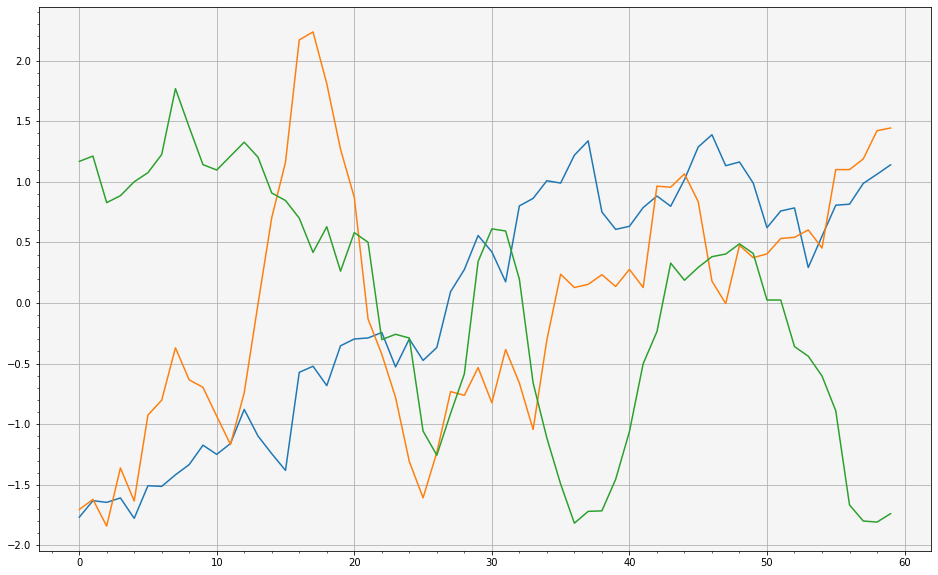

10000 8000 2000 60


In [ ]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = 'DATA2/x_' + str0 + '.csv'
fnamey = 'DATA2/y_' + str0 + '.csv'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis = 1)
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis = 1)
for n in range(N):
    x[n] = x[n] / xstd[n]
    
categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

### DATA reshaping

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


### Convolutional NN

ADAM with regularizer L1

In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


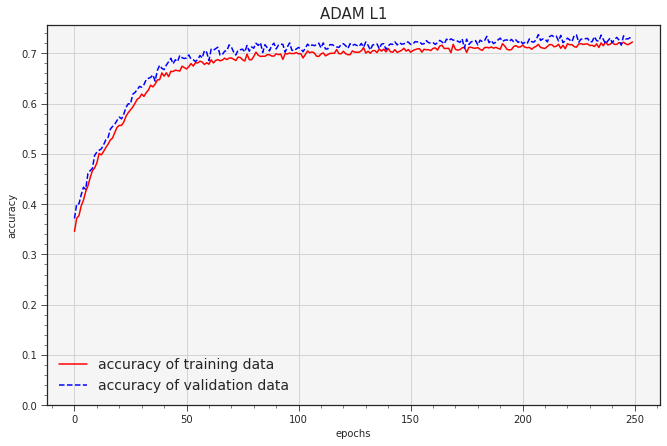

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


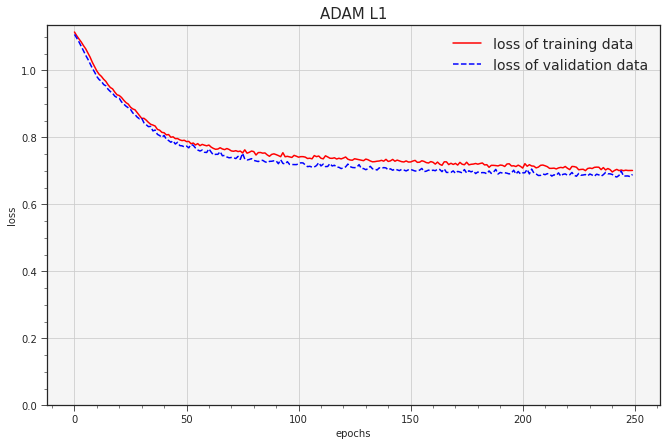

In [ ]:
ADAM_L1_50 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))SGD_L1_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

SGD with regularizer L1

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


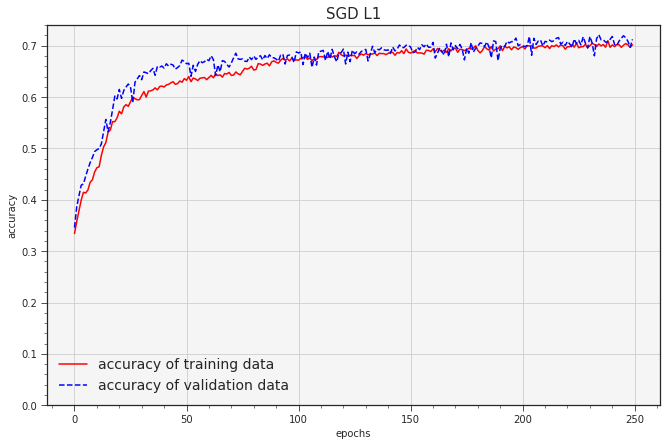

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


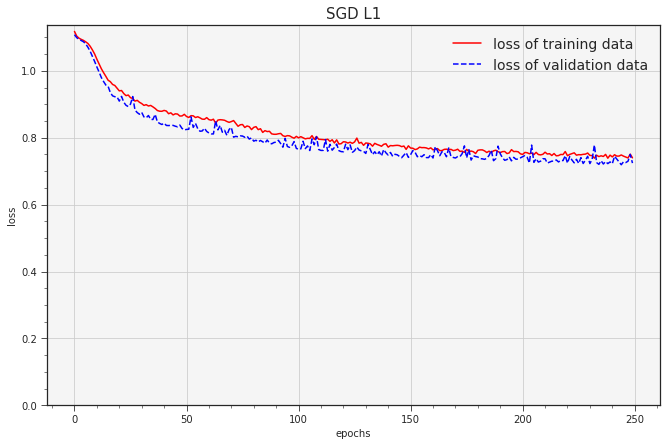

In [ ]:
SGD_L1_50 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))SGD_L1_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

### Regularizer L2
We have decided to try also with a different regularizer.

Adam with regularizer L2.

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


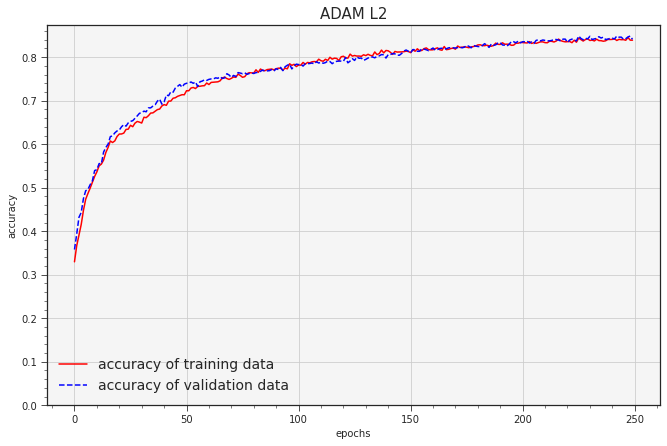

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


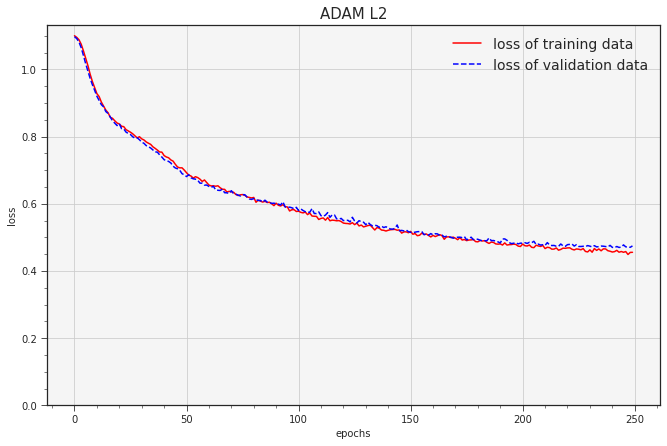

In [ ]:
ADAM_L2_50 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))SGD_L1_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

SGD with regularizer L2.

In [ ]:
np.random.seed(12345)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


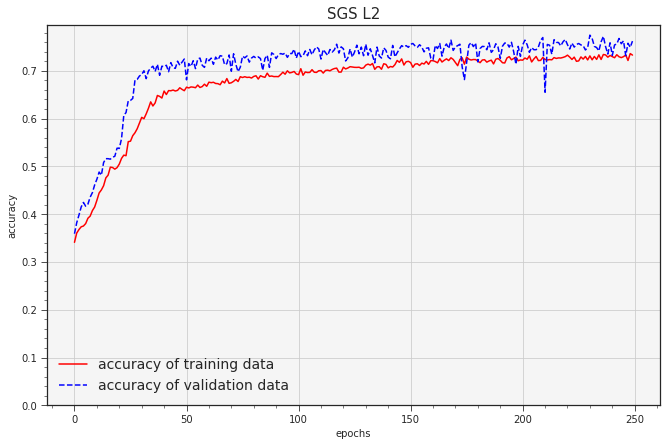

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


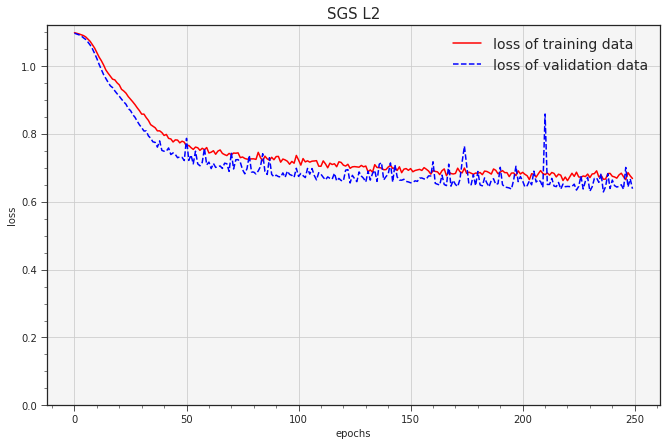

In [ ]:
SGD_L2_50 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))SGD_L1_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

Now we show the confusion matrix of all the $4$ models we have defined before.

# 1) Confusion matrix

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


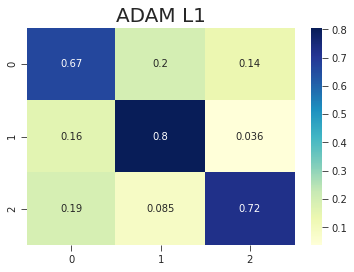

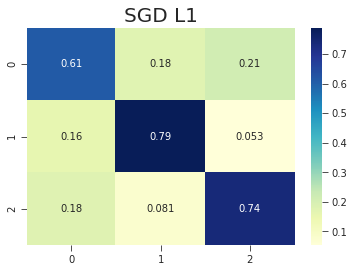

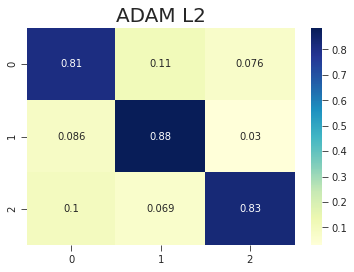

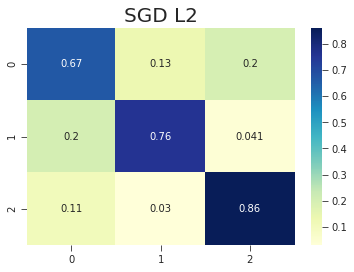

In [ ]:
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()


Let's see the trace of our confusion matrix to identify the best model.

In [ ]:
print('ADAM L1 ',confusion_matrix.trace())
print('SGD L1 ',confusion_matrix1.trace())
print('ADAM L2 ',confusion_matrix3.trace())
print('SGD L2 ',confusion_matrix4.trace())

ADAM L1  2.194609902256079
SGD L1  2.1376136256196228
ADAM L2  2.5230650440545492
SGD L2  2.2859921390656024


The best algorithm is Adam with regularizer L2

# 2) Different A/DX
We have created model for different $A/DX$, with $A=500$ fixed and $DX$ from $50$ to $70$. We have noticed that the network starts to fail discriminating the categories at around $DX=60$. Here the trace of the confusion matrix normalized is less than $0.60$.

All the models are in the appendix.

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


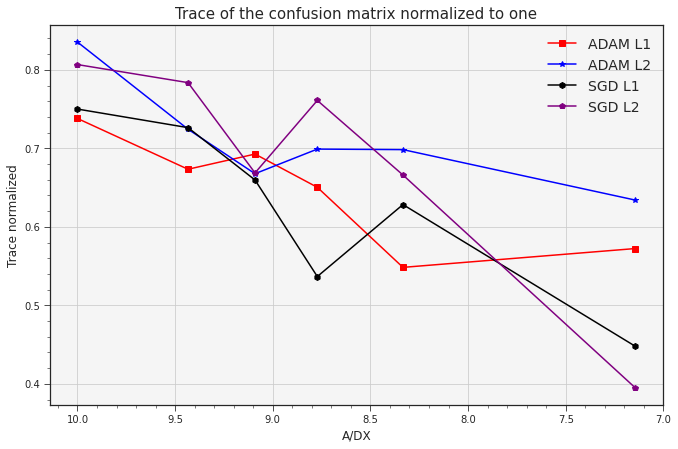

In [ ]:
trace_adam_l1 = np.array([2.214,2.020,2.078,1.951,1.645,1.717])
trace_sgd_l1  = np.array([2.250,2.179,1.979,1.610,1.885,1.343])
trace_adam_l2 = np.array([2.506,2.173,2.003,2.097,2.095,1.902]) 
trace_sgd_l2  = np.array([2.420,2.351,2.006,2.283,1.998,1.184])
noiseratio    = np.array([500/50,500/53,500/55,500/57,500/60,500/70])
plt.style.use('seaborn-ticks')

plt.figure(figsize=(11,7))
plt.plot(noiseratio,trace_adam_l1/3,'r',label="ADAM L1",marker='s')
plt.plot(noiseratio,trace_adam_l2/3,'b',label="ADAM L2",marker='*')
plt.plot(noiseratio,trace_sgd_l1/3,'k',label="SGD L1",marker='h')
plt.plot(noiseratio,trace_sgd_l2/3,'purple',label="SGD L2",marker='p') 
plt.legend(fontsize=14,loc='best')
plt.minorticks_on()
plt.gca().invert_xaxis()

ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.xlabel('A/DX', fontsize=12)
plt.ylabel('Trace normalized', fontsize=12)
plt.grid()
plt.title("Trace of the confusion matrix normalized to one",fontsize=15)
plt.show()

This is the visualization of the weights in the filters.

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


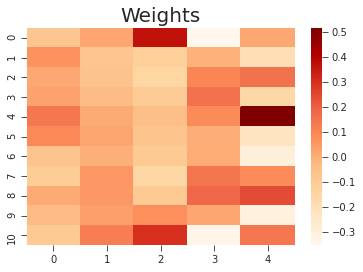

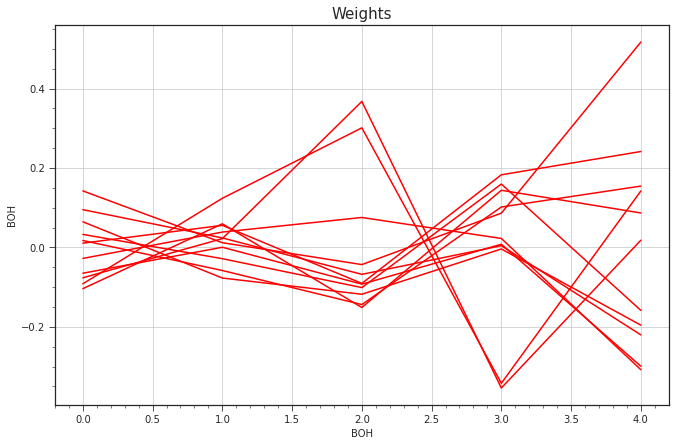

In [ ]:
weights,biases = model3.layers[0].get_weights()

ax = seaborn.heatmap(weights[:,0,:], cmap="OrRd")
ax.set_title('Weights', fontsize=20)

plt.figure(figsize = (11,7))
for i in range(weights.shape[0]): 
    ax.set_facecolor("whitesmoke")
    plt.plot(weights[i,0,:], 'r')

plt.style.use('seaborn-ticks')
plt.xticks()
plt.minorticks_on()
ax = plt.axes()
plt.grid()
plt.title("Weights",fontsize=15)
plt.ylabel('BOH')
plt.xlabel('BOH')
plt.show()

# Appendix

### DX = 53

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


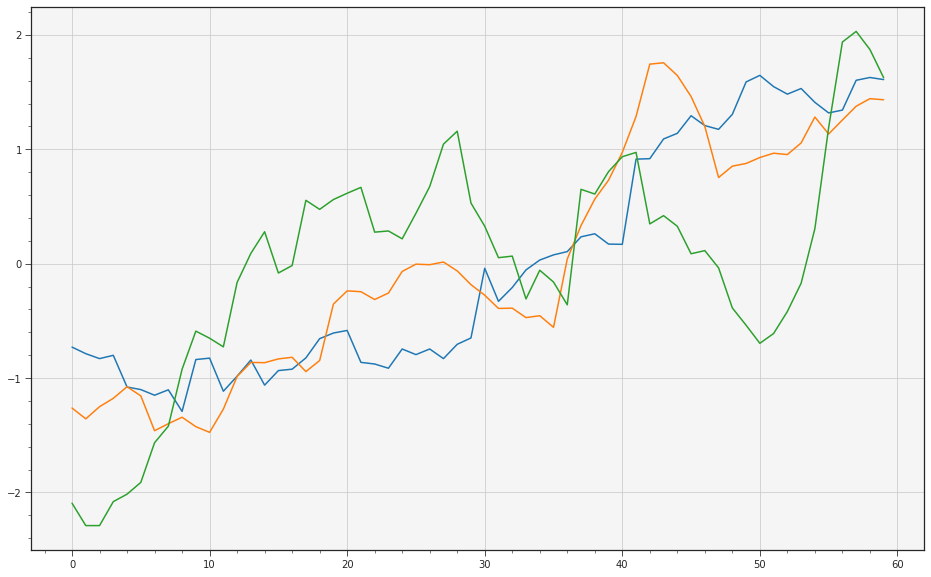

10000 8000 2000 60


In [ ]:
str0 = 'ts_L60_Z12_A500_DX53_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

# comment this part the first time
# without this the model is terrible
xm = x.mean(axis=1) # mean of each row
for n in range(N):
    x[n] = x[n] - xm[n] # we are shifted in the center, we are removing the mean
    
xstd = x.std(axis = 1) # standard deviation
for n in range(N):
    x[n] = x[n] / xstd[n]
    

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)
e
batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_4 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_4 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [ ]:
ADAM_L1_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_5 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_5 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [ ]:
SGD_L1_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_6 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_6 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [ ]:
ADAM_L2_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_7 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_7 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

In [ ]:
SGD_L2_53 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


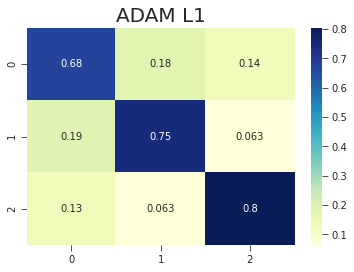

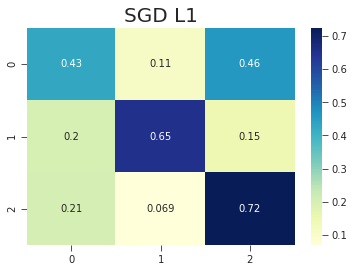

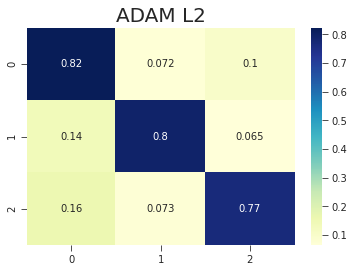

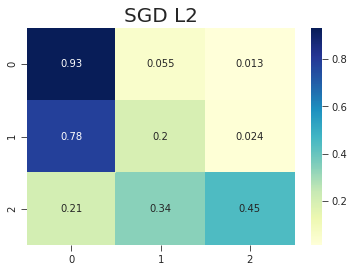

In [ ]:
import seaborn
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print(confusion_matrix.trace())
print(confusion_matrix1.trace())
print(confusion_matrix3.trace())
print(confusion_matrix4.trace())

2.233509371440406
1.8045774410092252
2.3865004434719577
1.576004790397594


### DX = 55

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


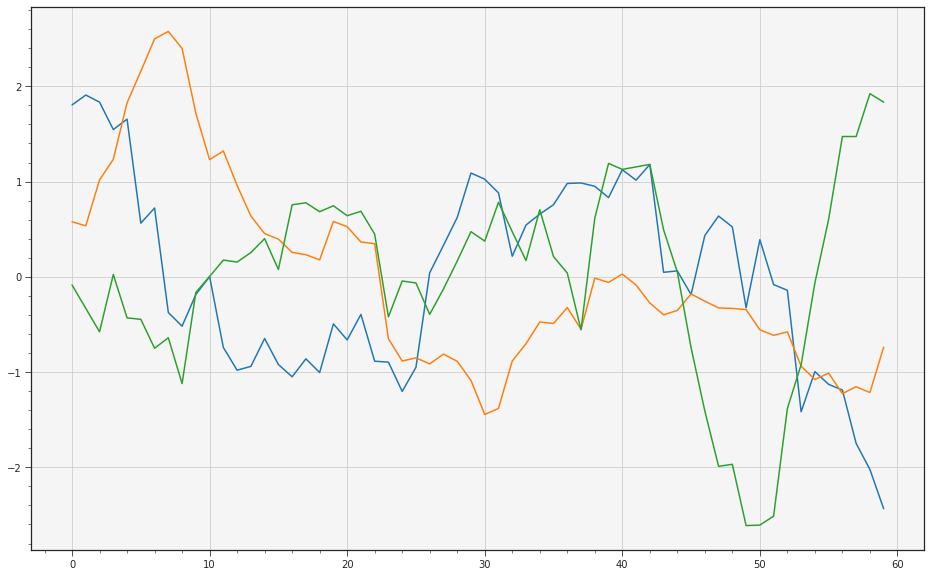

10000 8000 2000 60


In [ ]:
str0 = 'ts_L60_Z12_A500_DX55_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n] 
    
xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]


categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_8 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_8 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                

In [ ]:
ADAM_L1_55 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_9 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_9 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

In [ ]:
SGD_L1_55 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_10 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_10 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)               

In [ ]:
ADAM_L2_55 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_11 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_11 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

In [ ]:
SGD_L2_55 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


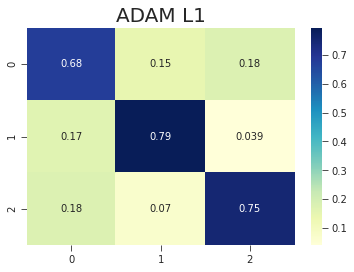

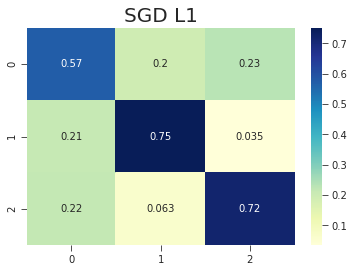

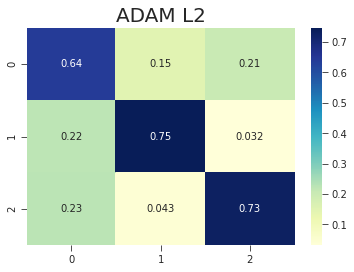

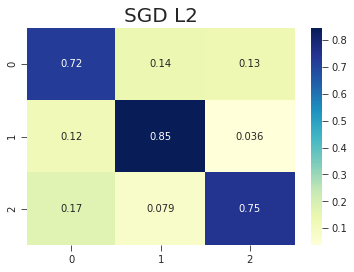

In [ ]:
import seaborn
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print(confusion_matrix.trace())
print(confusion_matrix1.trace())
print(confusion_matrix3.trace())
print(confusion_matrix4.trace())

2.2260784022403213
2.0431045738392064
2.1180603391997694
2.317609213411312


### DX = 57

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


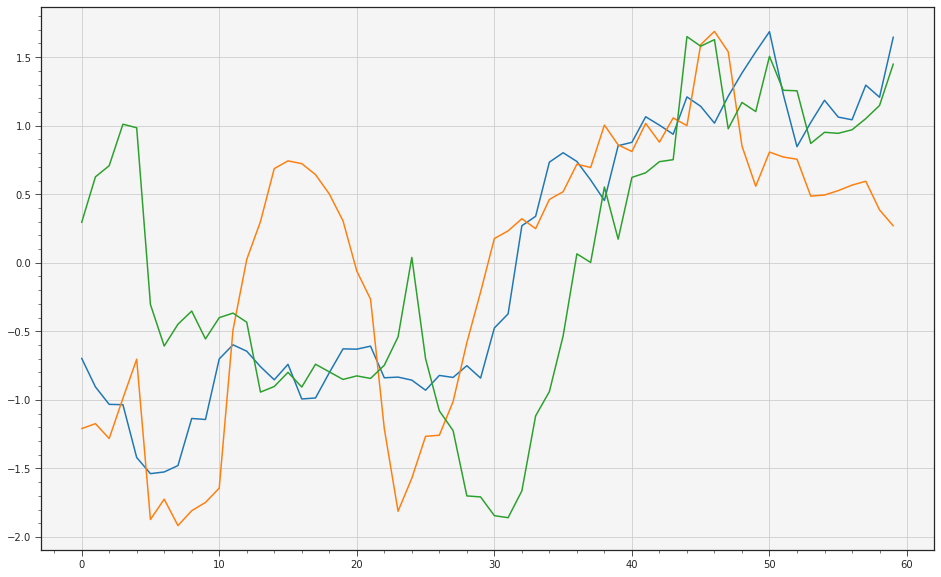

10000 8000 2000 60


In [ ]:

str0 = 'ts_L60_Z12_A500_DX57_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)


xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n] 
    
xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]



categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_12 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_12 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

In [ ]:
ADAM_L1_57 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_13 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_13 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)               

In [ ]:
SGD_L1_57 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_14 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_14 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 3)               

In [ ]:
ADAM_L2_57 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_15 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_15 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 3)               

In [ ]:
SGD_L2_57 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


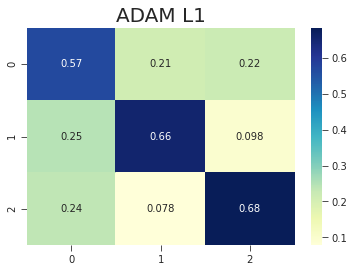

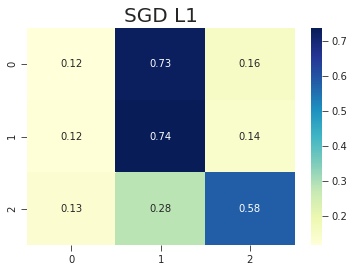

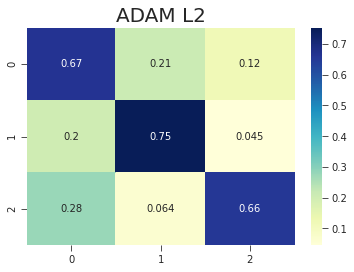

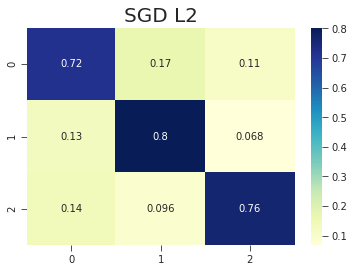

In [ ]:
import seaborn
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print(confusion_matrix.trace())
print(confusion_matrix1.trace())
print(confusion_matrix3.trace()) # biggest
print(confusion_matrix4.trace())

1.9080302191246719
1.4343886615250931
2.07459108283696
2.2875589232410825


### DX=60

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


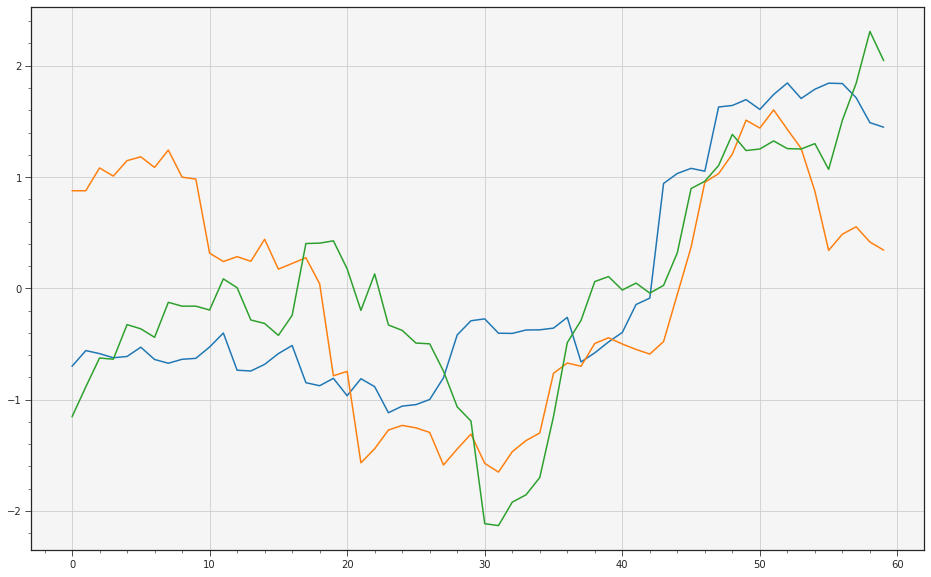

10000 8000 2000 60


In [ ]:
str0 = 'ts_L60_Z12_A500_DX60_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_16 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_16 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_16 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 3)               

In [ ]:
ADAM_L1_60 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_17 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_17 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 3)               

In [ ]:
SGD_L1_60 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_18 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_18 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 3)               

In [ ]:
ADAM_L2_60 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_19 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_19 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_19 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 3)               

In [ ]:
SGD_L2_60 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


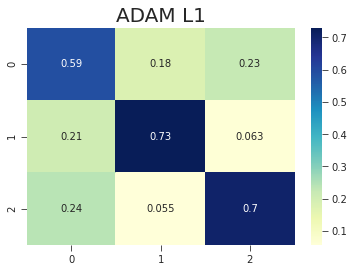

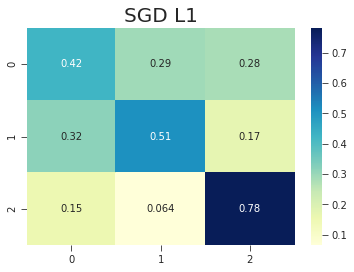

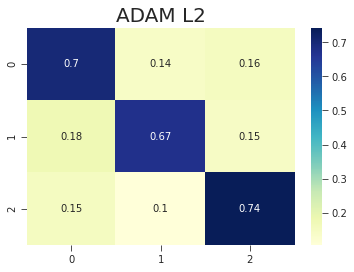

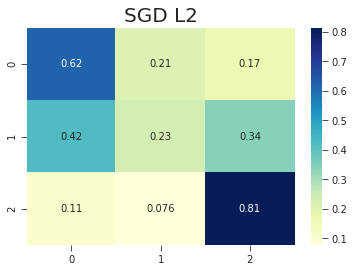

In [ ]:
import seaborn
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()

In [ ]:
print(confusion_matrix.trace())
print(confusion_matrix1.trace())
print(confusion_matrix3.trace()) # biggest
print(confusion_matrix4.trace())

2.0265813039426233
1.7174070622346487
2.117952285118702
1.6690168429298864


### DX=70

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


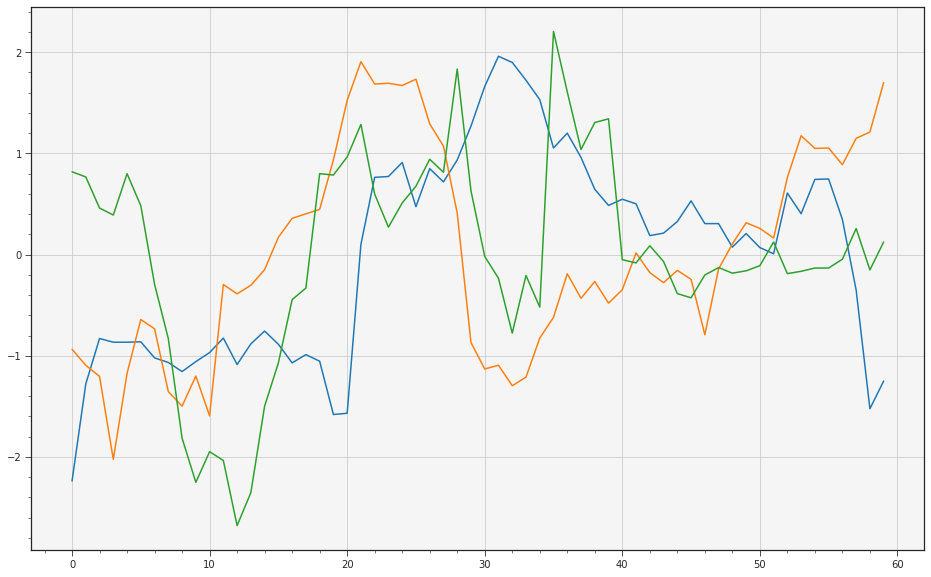

10000 8000 2000 60


In [ ]:
str0 = 'ts_L60_Z12_A500_DX70_bias5_N10000'
fnamex = 'DATA1/x_' + str0 + '.txt'
fnamey = 'DATA1/y_' + str0 + '.txt'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n] 

xstd = x.std(axis = 1) 
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_20 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_20 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_20 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)               

In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_21 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_21 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_21 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 3)               

In [ ]:
ADAM_L1_70 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model1 = create_model(regl1,ini, optimizer=opt)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_22 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_22 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_22 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 3)               

In [ ]:
SGD_L1_70 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

In [ ]:
regl2 = regularizers.l2(0.01)
np.random.seed(12345)

model3 = create_model(regl2,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_23 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_23 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_23 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 3)               

In [ ]:
np.random.seed(12345)

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model4 = create_model(regl2,ini, optimizer=opt)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_24 (Averag (None, 10, 5)             0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 4, 3)              108       
_________________________________________________________________
flatten_24 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_24 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 3)               

In [ ]:
ADAM_L2_70 = np.array((fit.history["accuracy"], fit.history['val_' + "accuracy"], fit.history["loss"], fit.history['val_' + "loss"]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


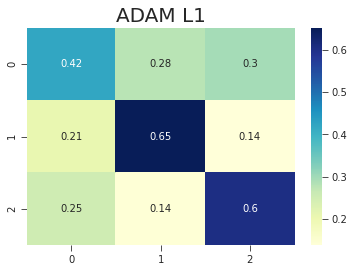

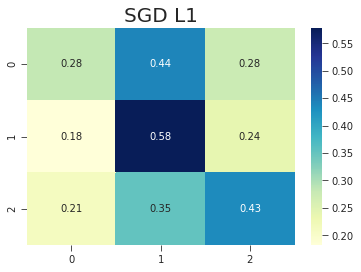

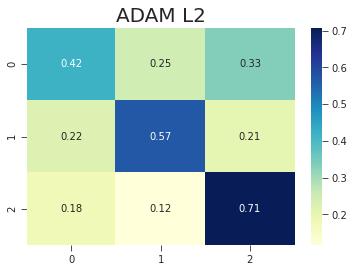

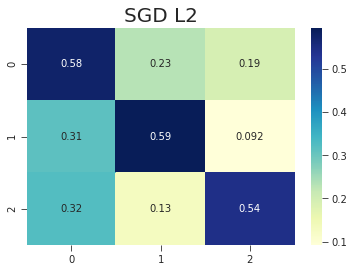

In [ ]:
import seaborn
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix

y_val_vect = categ[N_train:]

y_predict  = model.predict_classes(x_val)
y_predict1 = model1.predict_classes(x_val)
y_predict3 = model3.predict_classes(x_val)
y_predict4 = model4.predict_classes(x_val)

confusion_matrix  = skm.confusion_matrix(y_val_vect,y_predict, normalize='true')
confusion_matrix1 = skm.confusion_matrix(y_val_vect,y_predict1, normalize='true')
confusion_matrix3 = skm.confusion_matrix(y_val_vect,y_predict3, normalize='true')
confusion_matrix4 = skm.confusion_matrix(y_val_vect,y_predict4, normalize='true')

ax = seaborn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
ax.set_title('ADAM L1', fontsize=20)
plt.show()
ax1 = seaborn.heatmap(confusion_matrix1, annot=True, cmap="YlGnBu")
ax1.set_title('SGD L1', fontsize=20)
plt.show()
ax2 = seaborn.heatmap(confusion_matrix3, annot=True, cmap="YlGnBu")
ax2.set_title('ADAM L2', fontsize=20)
plt.show()
ax3 = seaborn.heatmap(confusion_matrix4, annot=True, cmap="YlGnBu")
ax3.set_title('SGD L2', fontsize=20)
plt.show()


In [ ]:
print(confusion_matrix.trace())
print(confusion_matrix1.trace())
print(confusion_matrix3.trace()) # biggest
print(confusion_matrix4.trace())

1.6786381583982783
1.2962190076133104
1.698006852429641
1.7145346245796023


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe671672-af6a-4685-87e3-e4b820a4c76e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>